# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Faishal Ali Dhiaulhaq
- Email: faishalald22@gmail.com
- Id Dicoding:

# Persiapan

## Menyiapkan Library yang Dibutuhkan

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [279]:
# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# Tampilkan semua baris (opsional, jika ingin)
pd.set_option('display.max_rows', None)

# Atur lebar kolom agar tidak terpotong (opsional)
pd.set_option('display.width', 0)

# Hindari pemotongan isi kolom
pd.set_option('display.max_colwidth', None)

# Data Gathering

In [280]:
DATA_PATH = 'data'

df = pd.read_csv(f'{DATA_PATH}/data.csv', encoding='utf-8-sig', sep=';')

In [281]:
df.head(20)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# Data Understanding

## Data Assessing

**Cek Total Baris dan Kolom**

In [282]:
df.shape

(4424, 37)

Terdapat 4424 total baris data dengan 47 kolom di dalam *dataframe* asli

**Cek Informasi tipe Data**

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Untuk tipe data yang ada sudah benar, namun nantinya perlu menambahkan beberapa *dictionary* berisi identitas setiap kode *unique* setiap kolom untuk kebutuhan visualisasi data.

**Pengecekan Nilai Null**

In [284]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Data tidak ada yang *null* dan dapat disimpulkan bahwa data juga siap untuk dilakukan proses *modelling* nantinya.

**Pengecekan Data Duplikat**

In [285]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat.

# Data Preparation / Preprocessing

## Exploratory Data Analysis (EDA)

### Deskripsi Umum Dataset

In [286]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


*Range* pada setiap data masih dalam rentang nilai *unique* yang aman, serta sesuai dengan yang ada pada dokumentasi dataset.

In [287]:
# Value asli kolom kategorikal
marital_status_val = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

application_mode_val = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old 42 - Transfer',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)',
}

course_val = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendace)'
}

daytime_evening_val = {1: 'daytime', 0: 'evening'}

previous_qual_val = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)',
}

nacionality_val = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian',
}

mother_qual_val = {
    1: 'Secondary Education - 12th Year of Schooling or Eq',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)',
}

father_qual_val = mother_qual_val.copy()

mother_occupation_val = {
    0: 'Student',
    1: 'Legislative/Executive Power, Directors & Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security, Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'ICT Specialists',
    131: 'Science & Engineering Technicians (Intermediate)',
    132: 'Health Technicians (Intermediate)',
    134: 'Legal, Social, Sports, Cultural Technicians (Intermediate)',
    141: 'Office workers, secretaries, data operators',
    143: 'Accounting, Finance, Registry-related Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers and Similar',
    171: 'Skilled Construction Workers (except electricians)',
    173: 'Printing, Instrument Making, Artisans, etc.',
    175: 'Food, Wood, Clothing Industry Workers & Craftsmen',
    191: 'Cleaning Workers',
    192: 'Unskilled Agriculture/Fisheries/Forestry Workers',
    193: 'Unskilled Industry/Construction/Transport Workers',
    194: 'Meal Preparation Assistants'
}

father_occupation_val = {
    0: 'Student',
    1: 'Legislative/Executive Representatives, Directors & Executives',
    2: 'Intellectual and Scientific Specialists',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative Staff',
    5: 'Personal Services, Security, Safety Workers and Sellers',
    6: 'Skilled Agricultural, Fishery, Forestry Workers',
    7: 'Skilled Industry, Construction and Craftsmen Workers',
    8: 'Machine Operators and Assemblers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces Personnel',
    112: 'Administrative and Commercial Services Directors',
    114: 'Hotel, Catering, Trade, and Other Services Directors',
    121: 'Specialists in Physical Sciences, Math, Engineering, etc.',
    122: 'Health Professionals',
    123: 'Teachers',
    124: 'Specialists in Finance, Admin, PR, Commercial Relations',
    131: 'Science and Engineering Technicians (Intermediate)',
    132: 'Health Technicians (Intermediate)',
    134: 'Legal, Social, Sports, Cultural Technicians (Intermediate)',
    135: 'ICT Technicians',
    141: 'Office Workers, Secretaries, Data Operators',
    143: 'Data, Accounting, Statistical, Financial, Registry Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers and Similar',
    154: 'Protection and Security Services Personnel',
    161: 'Market-Oriented Farmers & Skilled Agricultural Workers',
    163: 'Subsistence Farmers, Fishers, Hunters, Gatherers',
    171: 'Skilled Construction Workers (except electricians)',
    172: 'Skilled Metallurgy and Metalworking Workers',
    174: 'Skilled Electrical and Electronics Workers',
    175: 'Food, Wood, Clothing Industry Workers and Craftsmen',
    181: 'Fixed Plant and Machine Operators',
    182: 'Assembly Workers',
    183: 'Vehicle Drivers and Mobile Equipment Operators',
    192: 'Unskilled Agricultural, Fishery, Forestry Workers',
    193: 'Unskilled Industry, Construction, Manufacturing, Transport Workers',
    194: 'Meal Preparation Assistants',
    195: 'Street Vendors (non-food) and Street Service Providers',
}

displaced_val = {
    1: 'yes',
    0: 'no',
}

edu_special_needs_val = displaced_val.copy()

debtor = displaced_val.copy()

tuition_fees_val = displaced_val.copy()

gender_val = {
    1: 'male',
    0: 'female',
}

scholarship_hold_val = displaced_val.copy()

international_val = displaced_val.copy()

### Visualisasi Kolom Kategorikal Berbentuk Integer

In [288]:
true_cat_cols = ['Marital_status', 'Application_mode', 'Application_order',
                 'Course', 'Daytime_evening_attendance', 'Previous_qualification',
                 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
                 'Mothers_occupation', 'Fathers_occupation', 'Displaced',
                 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
                 'Gender', 'Scholarship_holder', 'International']

In [289]:
# fungsi untuk menampilkan data numerik
def visualize_numerical(df, cols):
    df[cols].hist(figsize=(25, 15), bins=15, color='blue', edgecolor='black')

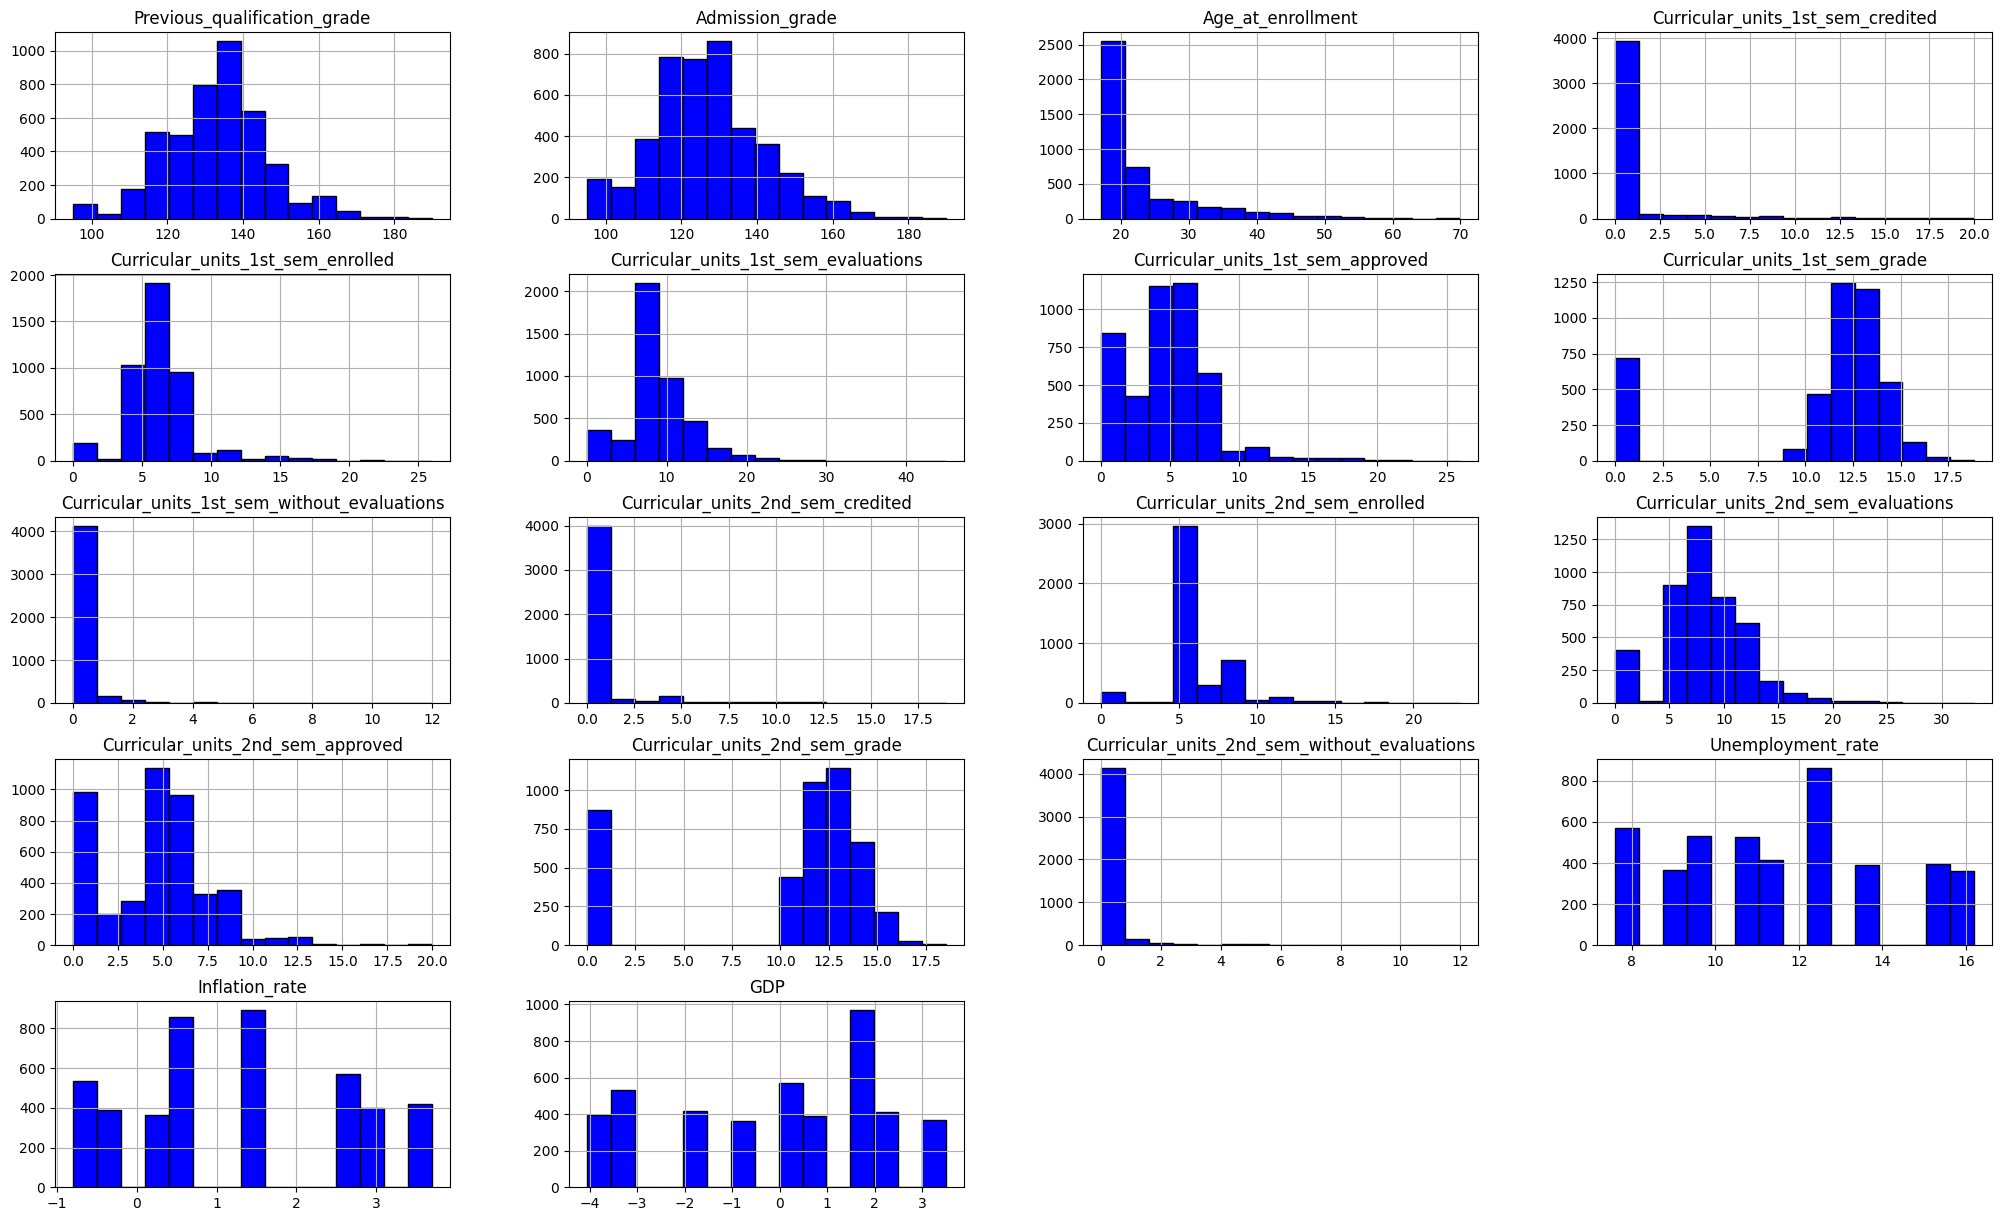

In [290]:
num_cols = [col for col in df.columns if col not in true_cat_cols]

visualize_numerical(df, num_cols)

Visualisasi data numerik menunjukkan bahwa sebagian besar fitur akademik seperti jumlah mata kuliah yang diambil, dievaluasi, dan disetujui memiliki distribusi miring ke kanan (right-skewed), mengindikasikan banyak mahasiswa hanya mengambil sedikit mata kuliah atau tidak mengikuti evaluasi. Nilai akademik seperti **Admission\_grade** dan **Previous\_qualification\_grade** cenderung terdistribusi normal, sedangkan usia saat pendaftaran mayoritas berada di rentang muda (18–20 tahun) dengan sebaran yang juga miring ke kanan. Variabel ekonomi seperti **Unemployment\_rate**, **Inflation\_rate**, dan *GDP* menunjukkan pola distribusi yang lebih kompleks atau multimodal, kemungkinan akibat variasi waktu atau wilayah. Distribusi yang tidak seimbang ini penting untuk dipertimbangkan dalam analisis lanjutan, terutama saat membangun model prediktif.


### Visualisasi Kolom Kategorikal

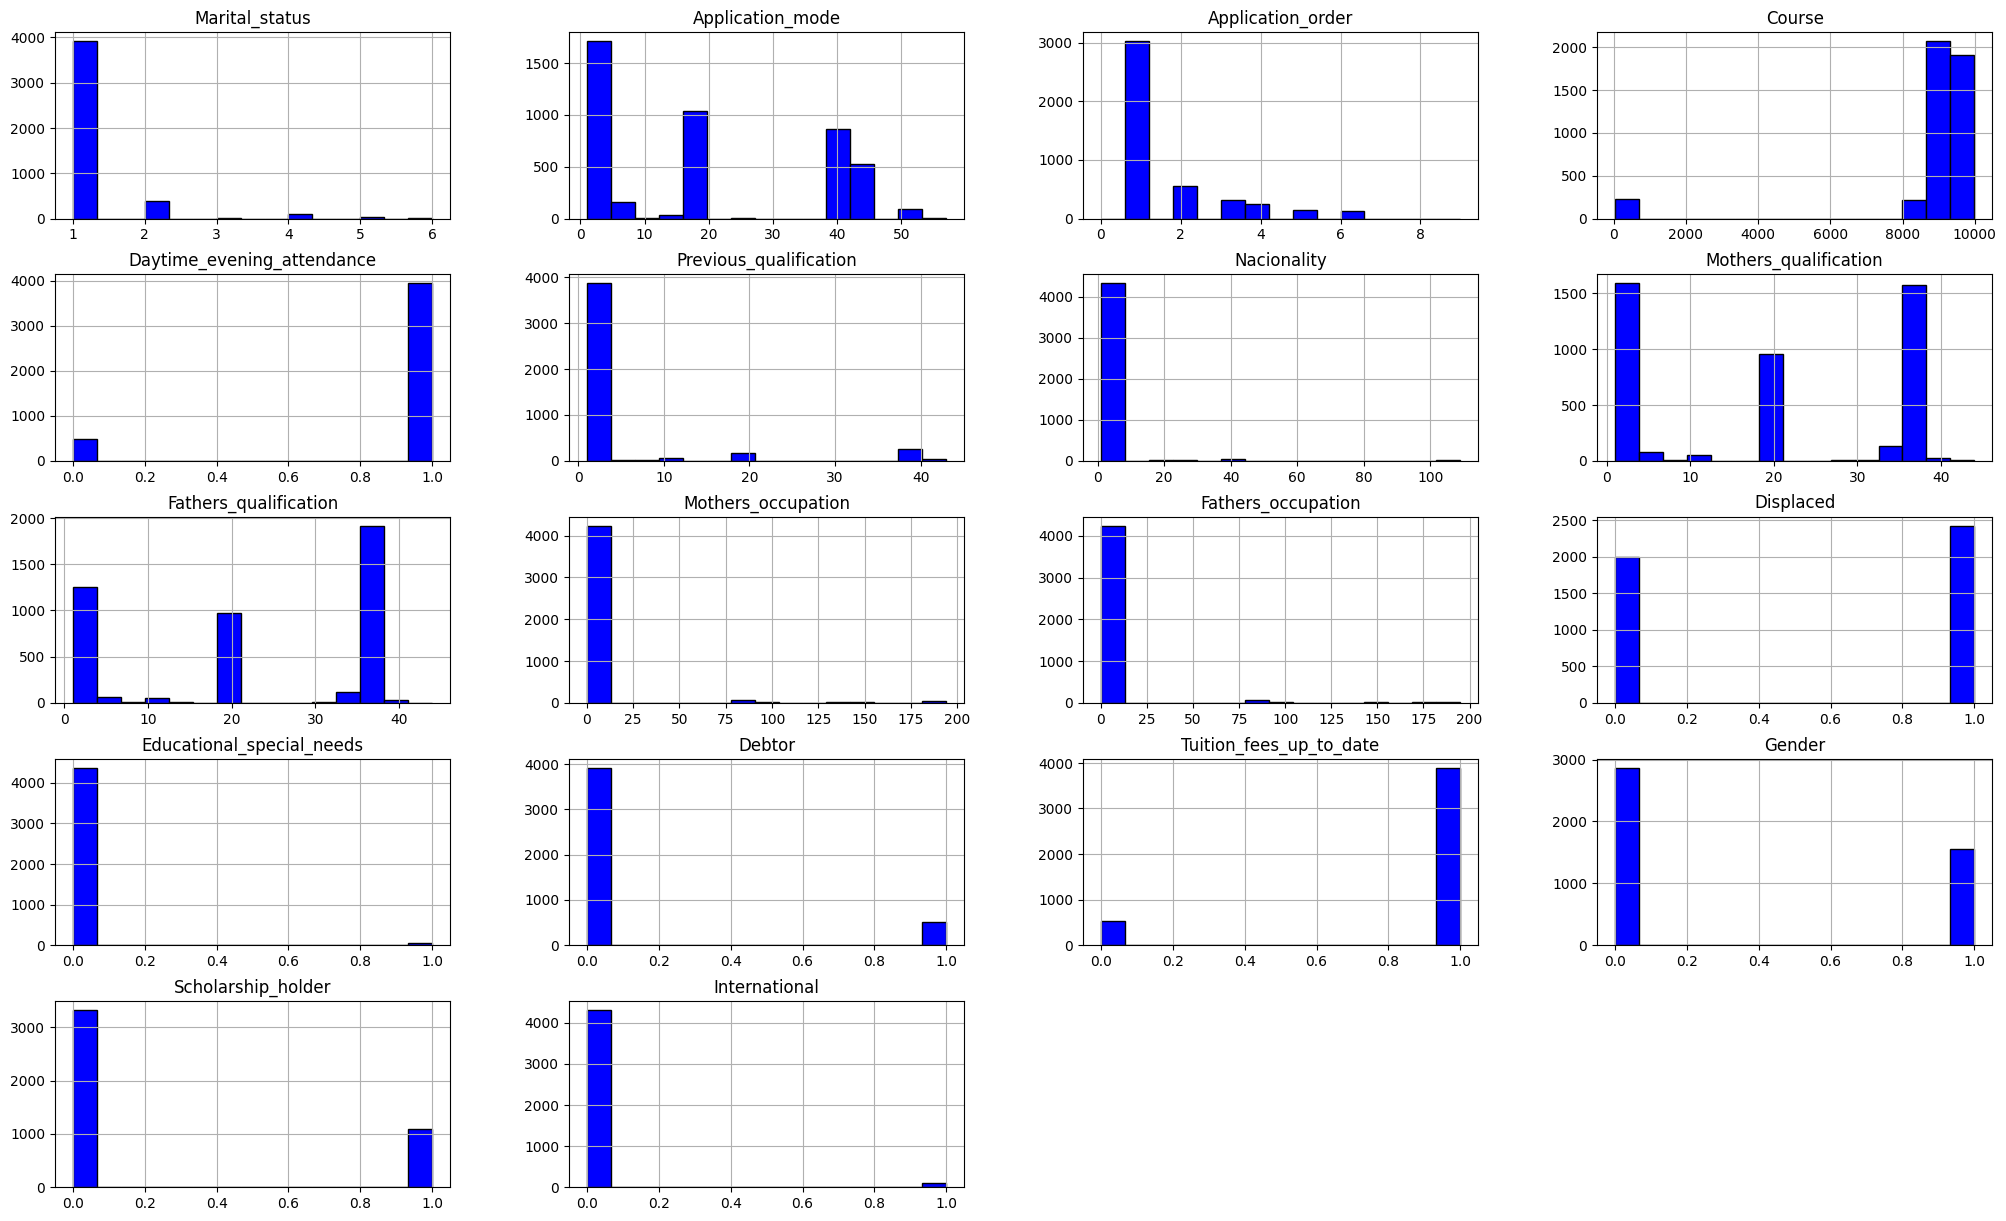

In [291]:
visualize_numerical(df, true_cat_cols)

Histogram kategori menunjukkan bahwa sebagian besar fitur kategorikal memiliki distribusi yang sangat tidak merata. Sebagian besar mahasiswa berstatus belum menikah, hadir di kelas siang, tidak memiliki kebutuhan khusus, bukan penerima beasiswa, dan bukan mahasiswa internasional. Kolom seperti **Application_mode**, **Course**, dan **Nationality** menunjukkan dominasi satu atau dua nilai kategori dengan banyak kategori minor. Orang tua mahasiswa mayoritas memiliki kode pendidikan dan pekerjaan tertentu, sementara sebagian besar mahasiswa tidak memiliki hutang (**Debtor**) dan membayar biaya kuliah tepat waktu. Ketidakseimbangan ini penting diperhatikan karena dapat memengaruhi analisis dan performa model klasifikasi, terutama dalam konteks feature importance dan overfitting.


### Visualisasi Kolom *Object*

In [292]:
def visualize_categorical(df, cols, ncols=3):
    # Set jumlah kolom per baris
    n_cols = ncols
    n_rows = math.ceil(len(cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(cols):
        rotate = 45 if len(df[feature].unique()) > 5 else 0
        
        if feature == 'Department':
            rotate = 30
        
        sns.countplot(data=df, x=feature, ax=axes[i])
        axes[i].set_title(f"Count Plot for {feature}")
        axes[i].tick_params(axis='x', rotation=rotate)

    # Matikan subplot kosong (jika ada)
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

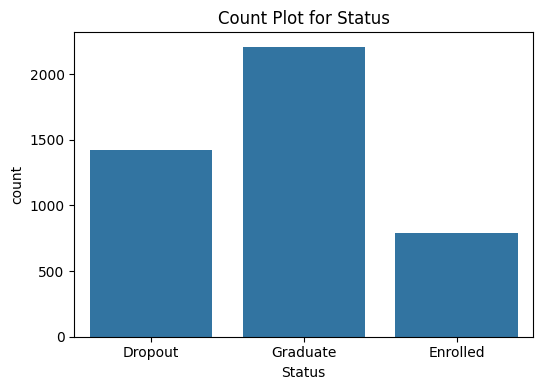

In [293]:
categorical_cols = df.select_dtypes(include=['object']).columns

visualize_categorical(df, categorical_cols, ncols=3)

Data siswa di dominasi dengan kategori siswa *graduate* yang memperoleh banyak data tertinggi. Terdapat ketidakseimbangan data label yang ditandai dengan label *enrolled* yang terbilang paling sedikit daripada kategori lainnya.

### Distribusi Kolom Non Kategorikal

In [294]:
# Helper visualisasi Boxplot
def boxplot_visualize_helper(df, col):
    sns.boxplot(x=df[col])
    plt.title(f'Kolom {col}')
    plt.show()

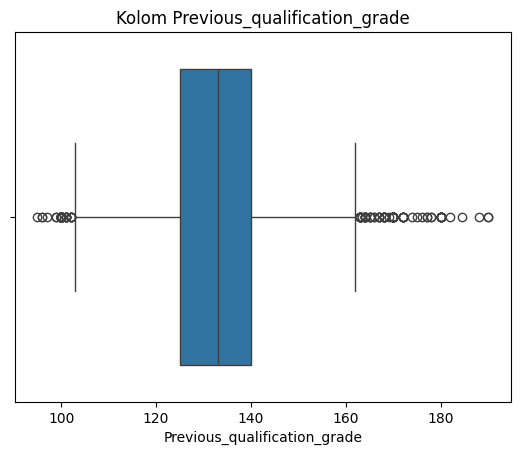

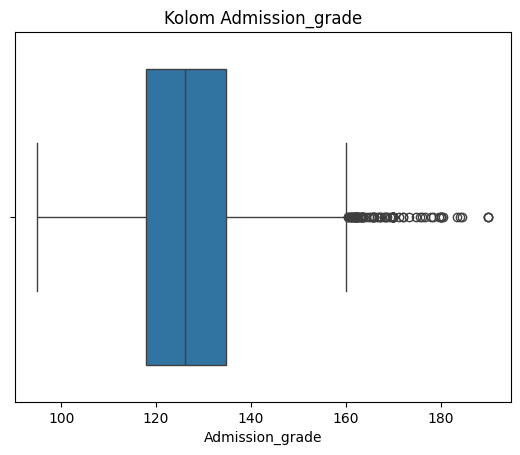

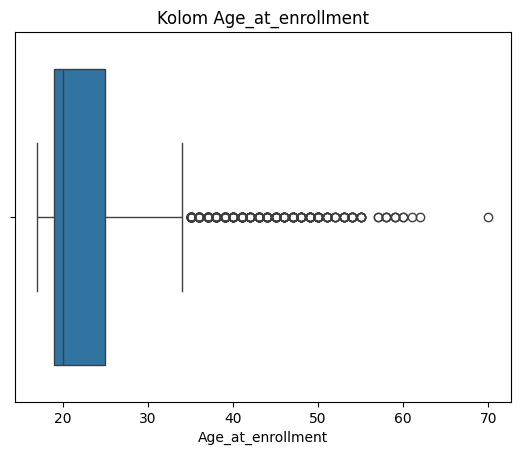

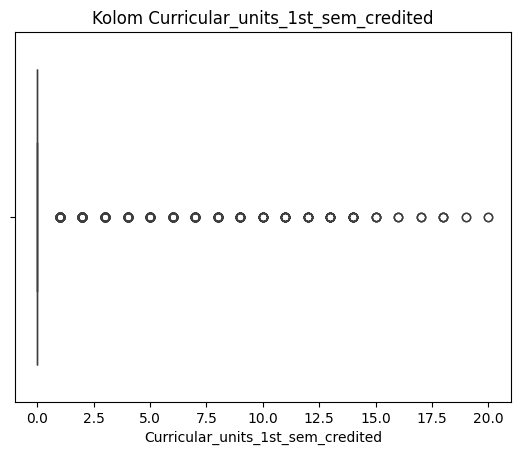

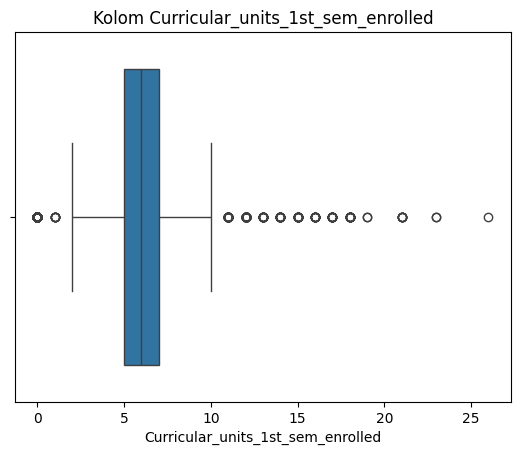

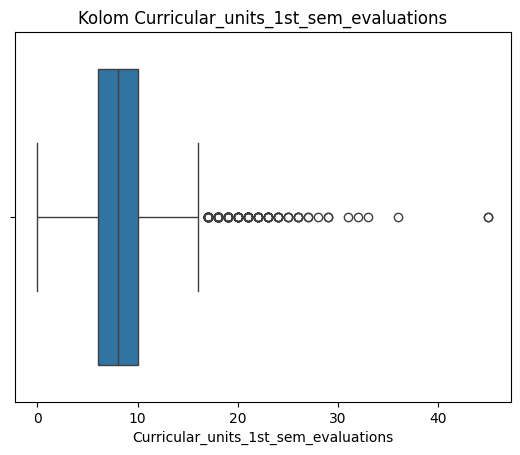

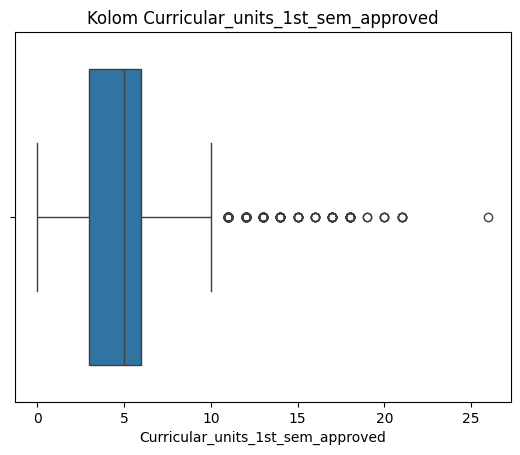

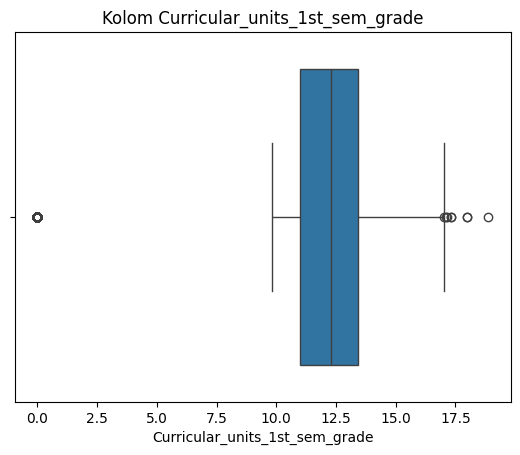

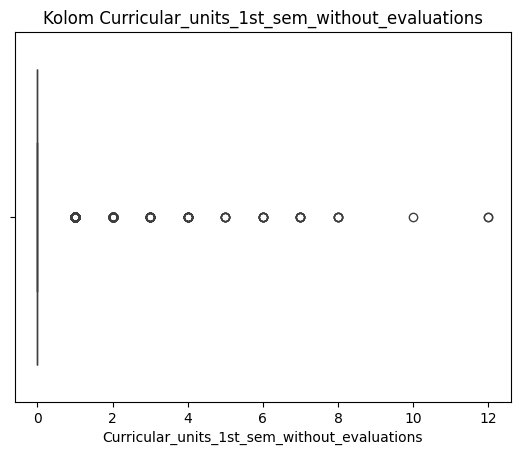

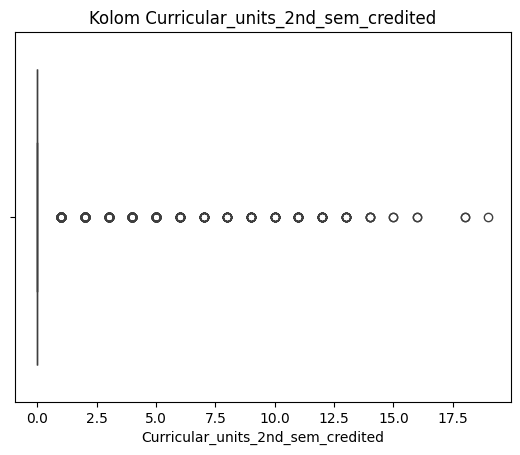

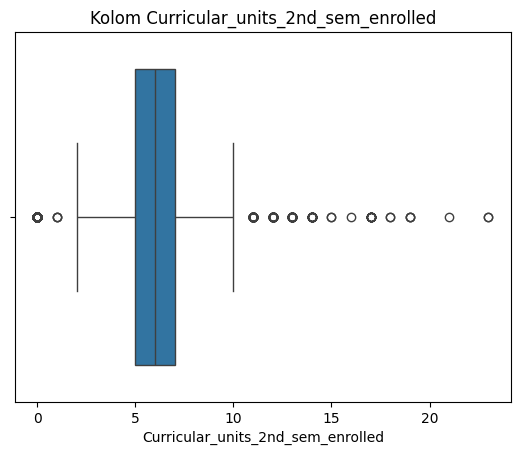

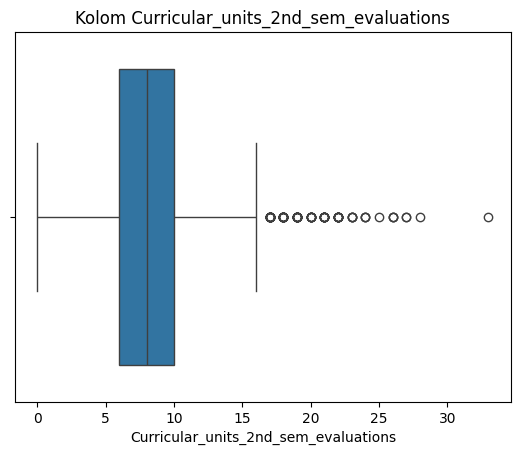

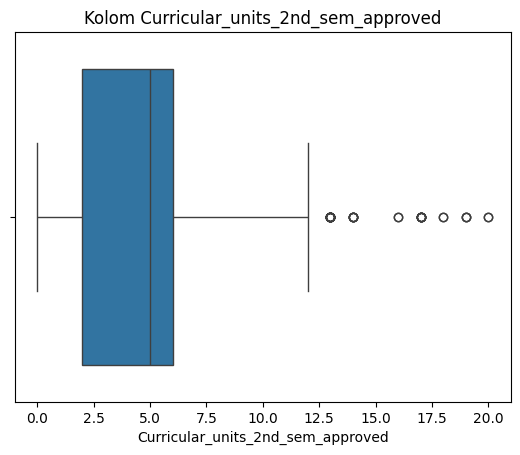

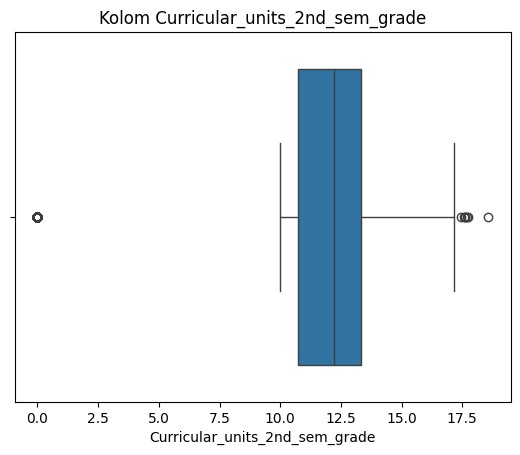

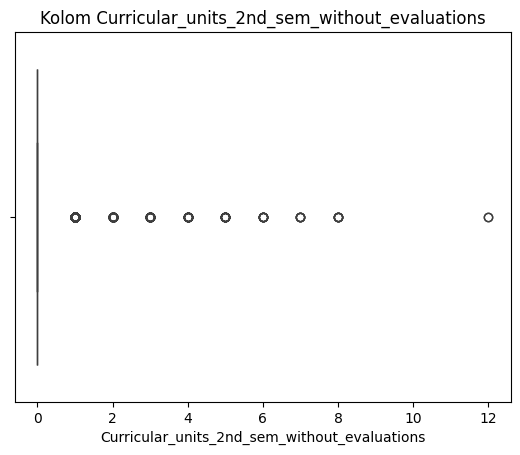

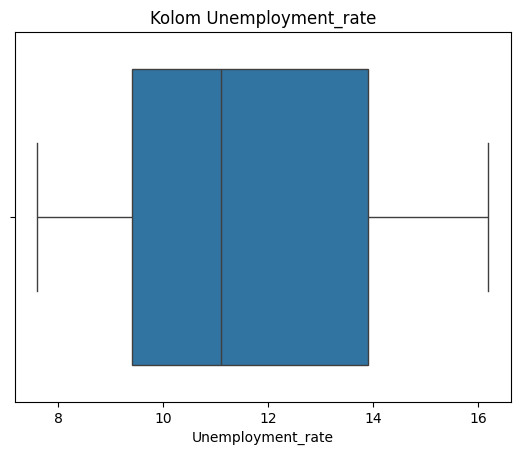

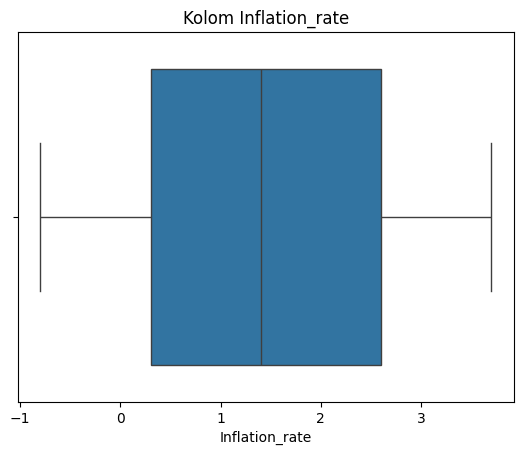

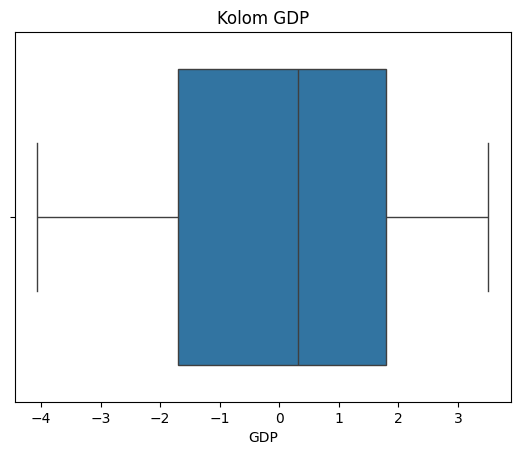

In [295]:
non_cat_cols = [col for col in df.columns.tolist() 
                if col not in true_cat_cols
                and col != 'Status']

for col in non_cat_cols:
    boxplot_visualize_helper(df, col)

## Analisis *Outliers*

Analisis *outliers* dilakukan dengan tujuan membuat data bersih untuk proses *modelling*. Penghapusan nilai outlier menggunakan rumus *Inter Quartile Range* (IQR).

In [296]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [297]:
def iqr_outliers_removal(df, cols_check, k=1.5):
    df_clean = df.copy()
    print('Banyak baris awal:', df_clean.shape[0])
    
    outlier_mask = pd.Series(False, index=df_clean.index)

    for col in cols_check:
        if col not in df_clean.columns:
            continue
        
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        outlier_mask |= mask

        print(f"{col}: outliers detected = {mask.sum()}")

    df_clean = df_clean[~outlier_mask]
    print('Banyak baris akhir:', df_clean.shape[0])
    
    return df_clean


**Hapus Nilai *Outliers***

In [298]:
cleaned_df = iqr_outliers_removal(df, non_cat_cols, k=3)

cleaned_df.to_csv(f'{DATA_PATH}/cleaned_data.csv')

Banyak baris awal: 4424
Previous_qualification_grade: outliers detected = 3
Admission_grade: outliers detected = 3
Age_at_enrollment: outliers detected = 156
Curricular_units_1st_sem_credited: outliers detected = 577
Curricular_units_1st_sem_enrolled: outliers detected = 106
Curricular_units_1st_sem_evaluations: outliers detected = 33
Curricular_units_1st_sem_approved: outliers detected = 40
Curricular_units_1st_sem_grade: outliers detected = 718
Curricular_units_1st_sem_without_evaluations: outliers detected = 294
Curricular_units_2nd_sem_credited: outliers detected = 530
Curricular_units_2nd_sem_enrolled: outliers detected = 45
Curricular_units_2nd_sem_evaluations: outliers detected = 15
Curricular_units_2nd_sem_approved: outliers detected = 5
Curricular_units_2nd_sem_grade: outliers detected = 870
Curricular_units_2nd_sem_without_evaluations: outliers detected = 282
Unemployment_rate: outliers detected = 0
Inflation_rate: outliers detected = 0
GDP: outliers detected = 0
Banyak baris

**Re-check Distribusi Data**

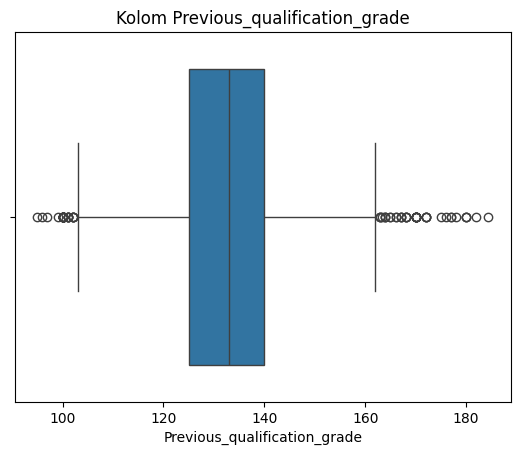

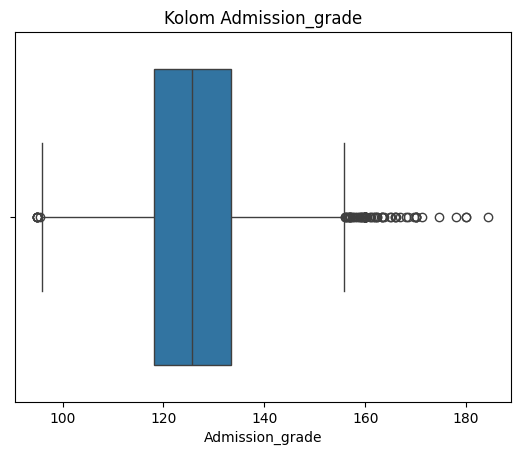

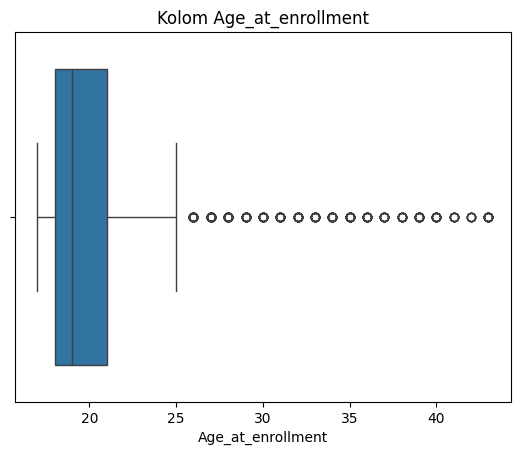

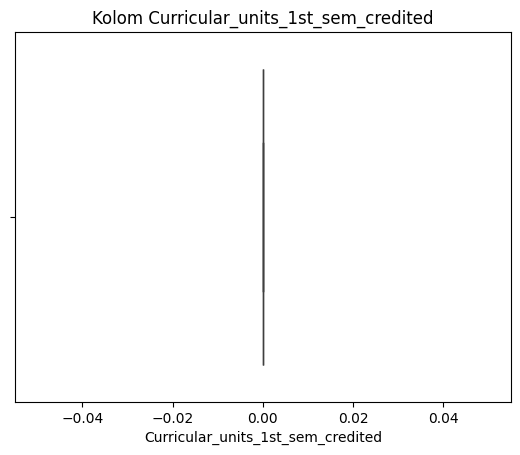

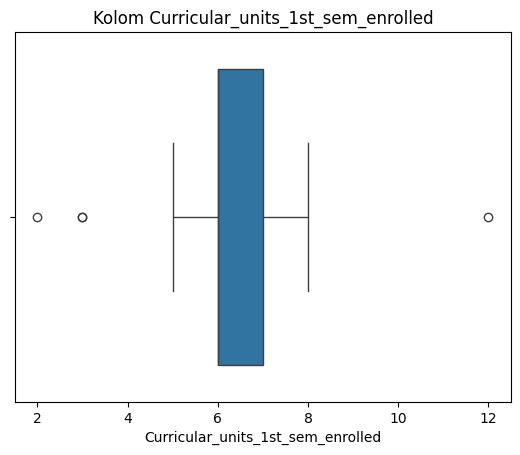

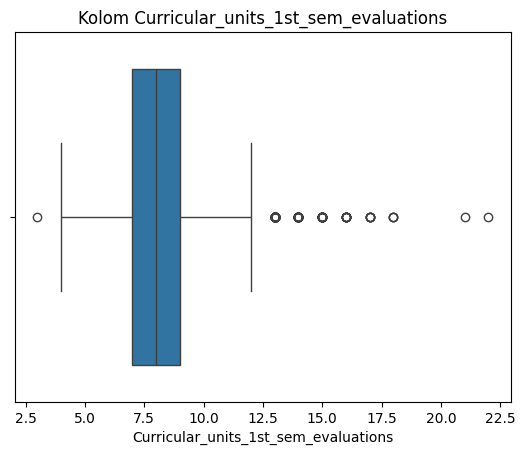

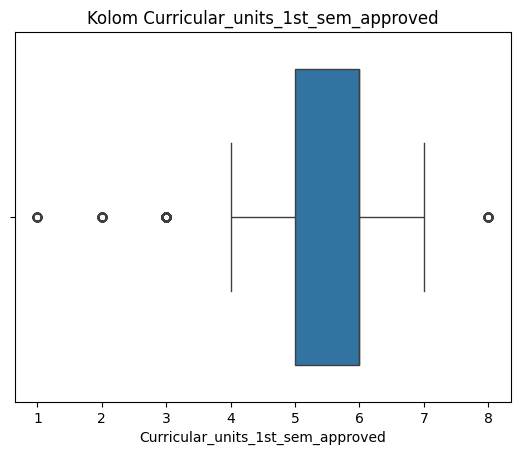

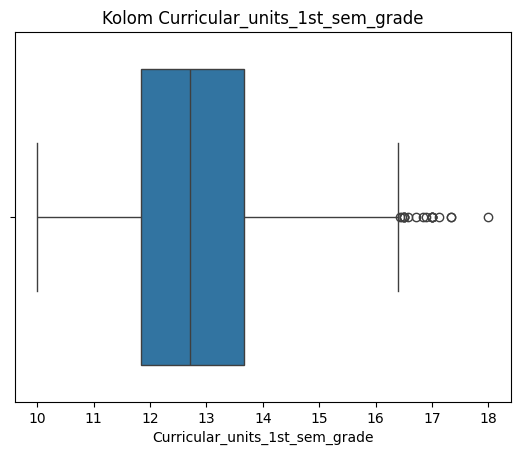

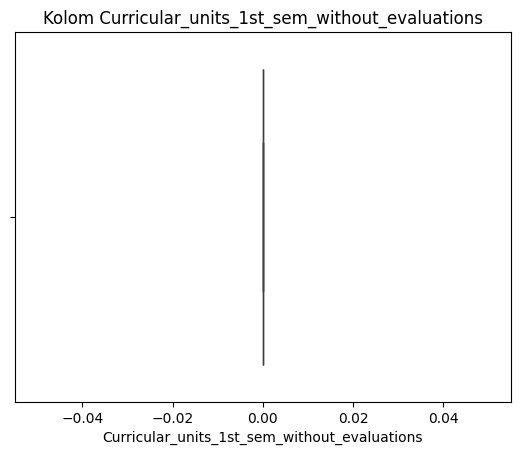

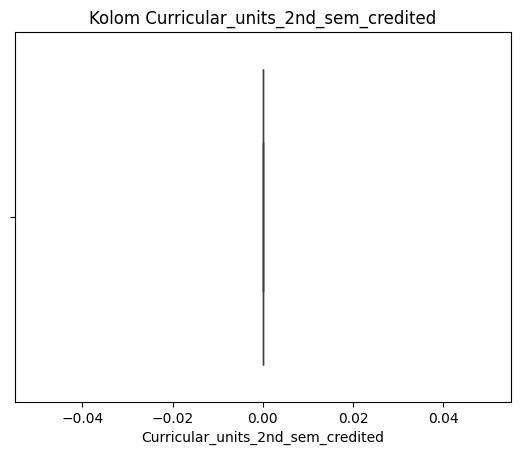

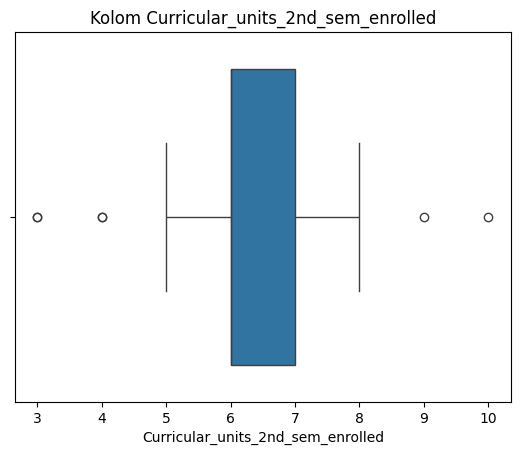

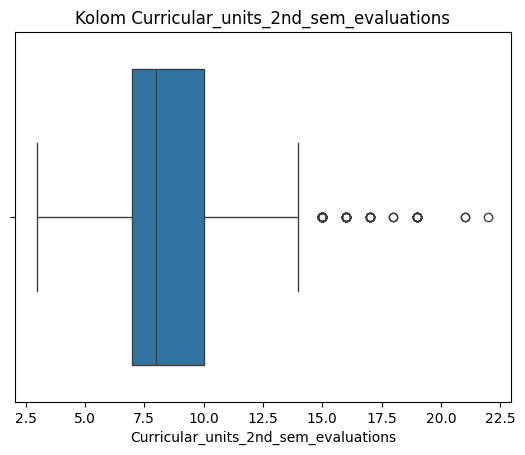

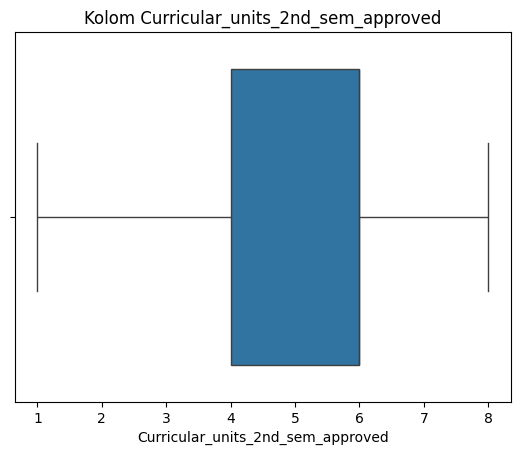

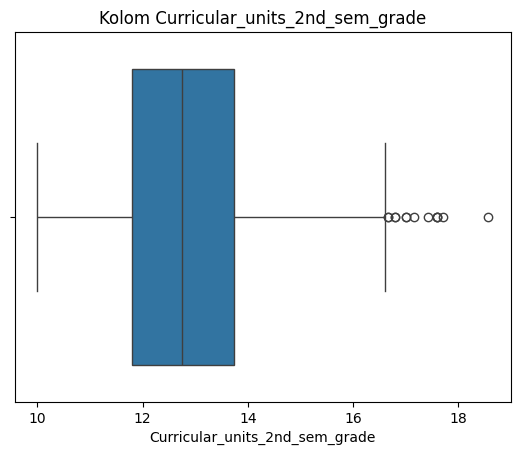

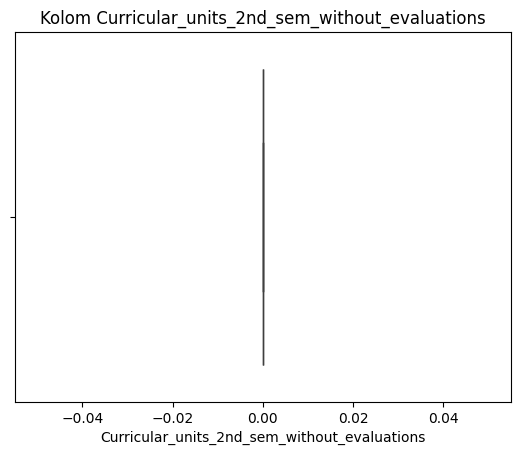

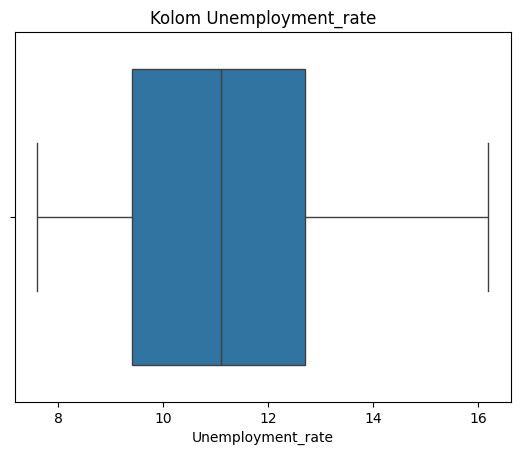

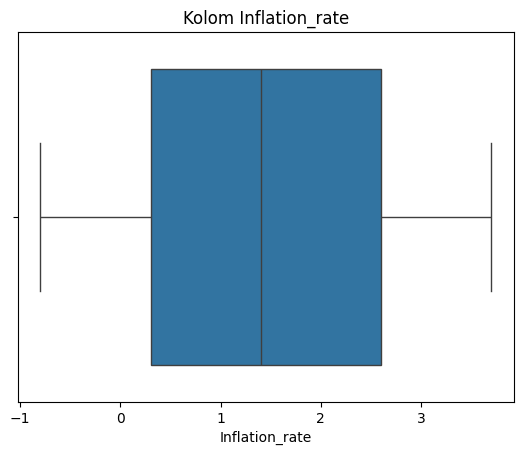

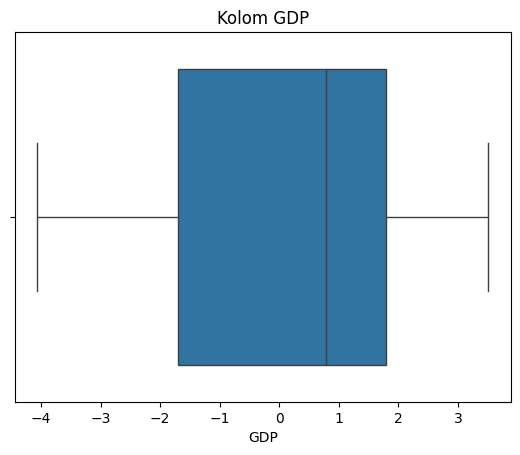

In [299]:
for col in non_cat_cols:
    boxplot_visualize_helper(cleaned_df, col)

## Feature Engineering

1. Total_units_enrolled: Menambahkan kolom jumlah *enrolled units* di Semester 1 dan 2.

In [300]:
def total_units_enrolled_col(df):
    total_enrolled_un = (df['Curricular_units_1st_sem_enrolled'] + 
                         df['Curricular_units_2nd_sem_enrolled'])

    df['Total_units_enrolled'] = total_enrolled_un

    return df

In [301]:
df = total_units_enrolled_col(df)
cleaned_df = total_units_enrolled_col(cleaned_df)

2. Total_units_approved: Menambahkan kolom jumlah *approved units* di Semester 1 dan 2.

In [302]:
def total_units_approved_col(df):
    total_enrolled_un = (df['Curricular_units_1st_sem_approved'] + 
                         df['Curricular_units_2nd_sem_approved'])

    df['Total_units_approved'] = total_enrolled_un

    return df

In [303]:
df = total_units_approved_col(df)
cleaned_df = total_units_approved_col(cleaned_df)

3. Approval_rate: Menambahkan kolom rata-rata *rate total approved units* dengan *total enrolled units*.

In [304]:
def approval_rate_col(df):
    approval_rate = (df['Total_units_approved'] /
                     df['Total_units_enrolled'])

    df['Approval_rate'] = approval_rate
    df['Approval_rate'] = df['Approval_rate'].fillna(0)

    return df

In [305]:
df = approval_rate_col(df)
cleaned_df = approval_rate_col(cleaned_df)

4. Weighted_avg_grade: Menambahkan kolom rata-rata operasi kombinasi *enrolled units* dengan *grade* siswa di setiap semesternya.

In [306]:
def weighted_avg_grade_col(df):
    total_credits = (df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled'])
    weigthed_grade = ((df['Curricular_units_1st_sem_grade'] * df['Curricular_units_1st_sem_enrolled']) +
                       (df['Curricular_units_2nd_sem_grade'] * df['Curricular_units_2nd_sem_enrolled']) /
                       total_credits) 
    
    df['Weighted_avg_grade'] = weigthed_grade
    
    return df

In [307]:
df = weighted_avg_grade_col(df)
cleaned_df = weighted_avg_grade_col(cleaned_df)

5. Total_units_without_eval: Menambahkan kolom jumlah total *units* yang tidak berstatus *evaluation*.

In [308]:
def units_without_eval_col(df):
    without_eval = (df['Curricular_units_1st_sem_without_evaluations'] +
                    df['Curricular_units_2nd_sem_without_evaluations'])

    df['Total_units_without_eval'] = without_eval
    
    return df

In [309]:
df = units_without_eval_col(df)
cleaned_df = units_without_eval_col(cleaned_df)

6. Econ_pressure: Menambahkan kolom kombinasi beban ekonomi siswa.

In [310]:
def econ_pressure_col(df):
    marital_weight = np.where(df['Marital_status'] == 1, 1, 2)
    debtor_weight = np.where(df['Debtor'] == 1, 1.5, 1)  # lebih berat kalau berutang

    total_weight = marital_weight * debtor_weight

    df['Econ_pressure'] = (df['Unemployment_rate'] * df['Inflation_rate']) * total_weight
    return df


In [311]:
df = econ_pressure_col(df)
cleaned_df = econ_pressure_col(cleaned_df)

## Analisis *Matrix Correlation*

**Encoding Kolom Status**

In [312]:
le = LabelEncoder()

cleaned_df['Status'] = le.fit_transform(cleaned_df['Status'])

**Visualisasi Matrix Correlation**

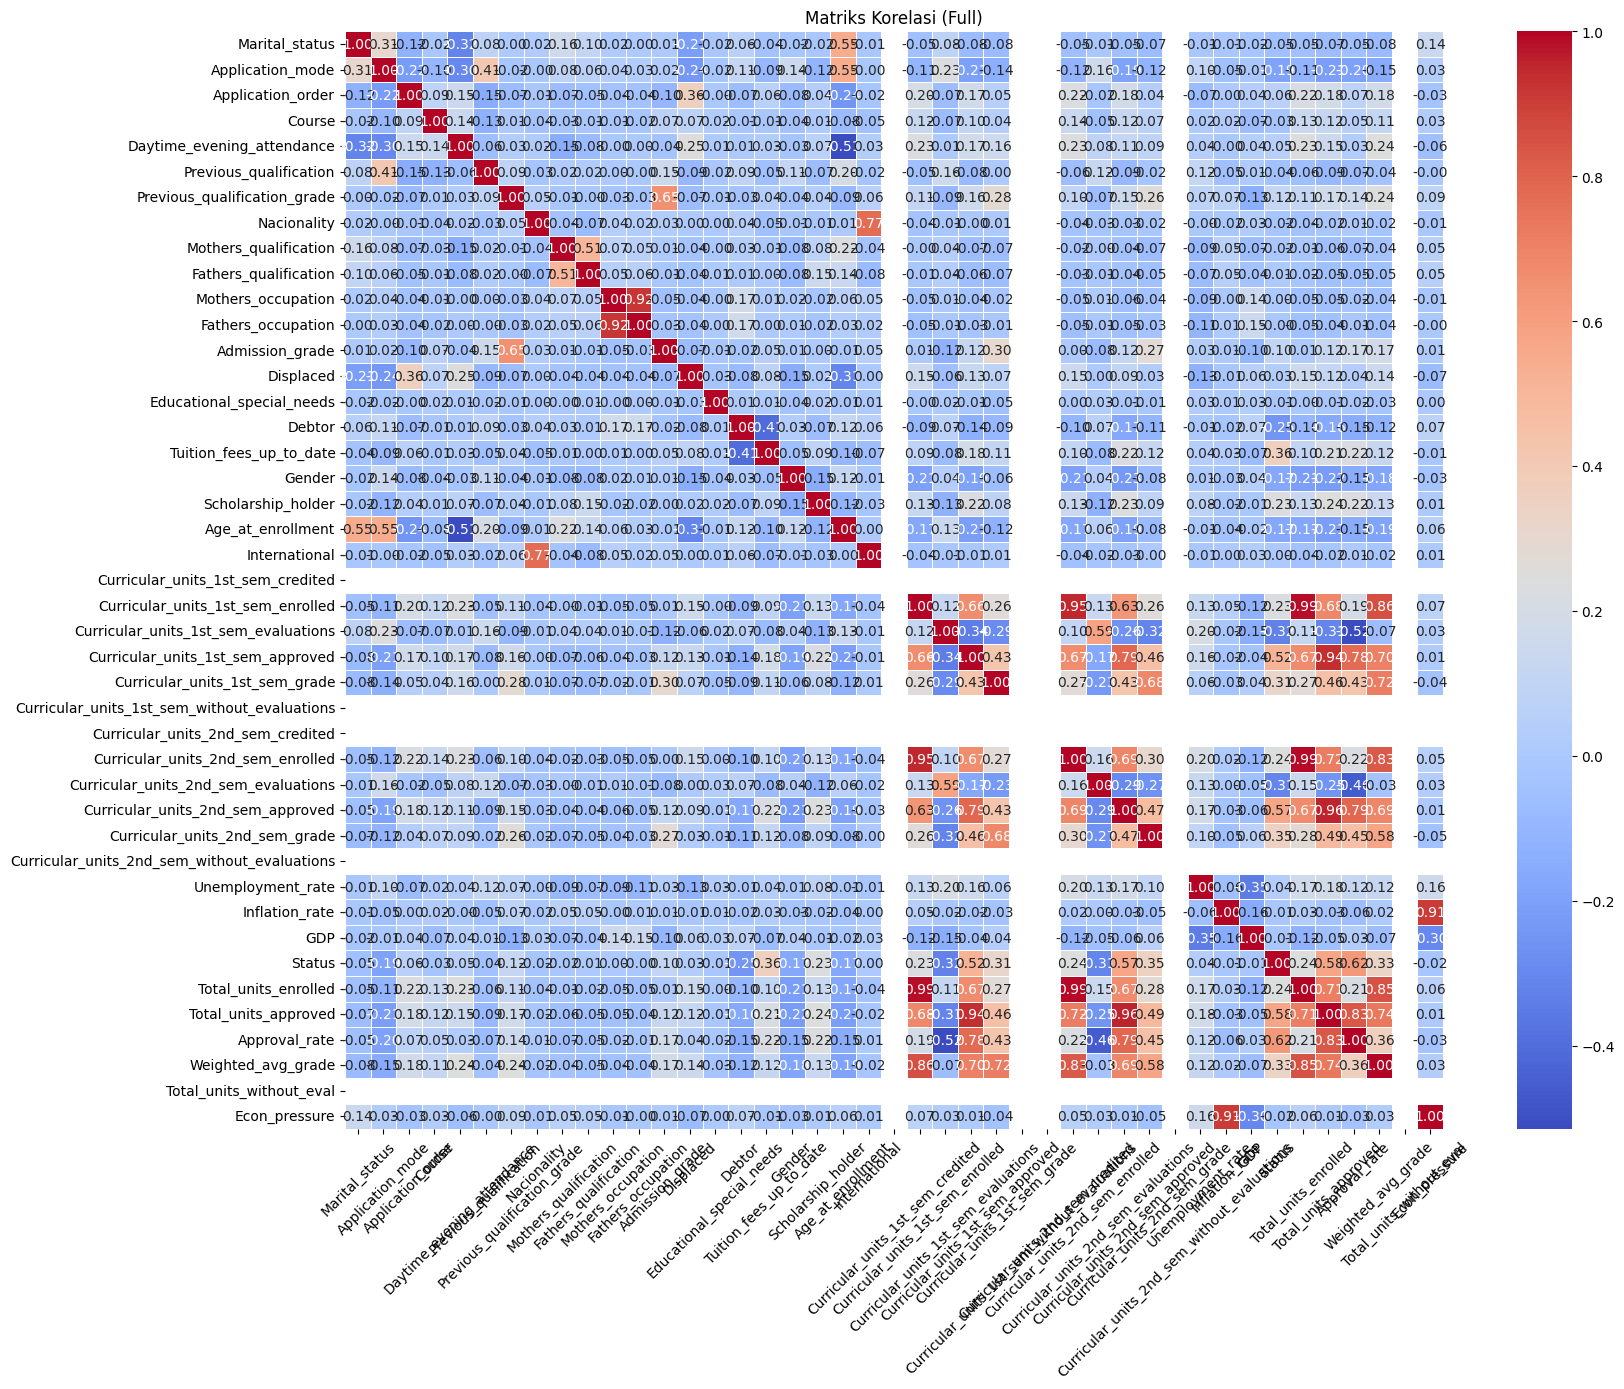

In [313]:
matrix_corr_cols = cleaned_df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = matrix_corr_cols.corr()

# Buat heatmap dari matriks korelasi
plt.figure(figsize=(18, 14))  # Perbesar sesuai kebutuhan
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Matriks Korelasi (Full)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [314]:
# Korelasi dengan target Status
target_corr = correlation_matrix['Status'].sort_values(ascending=False)
print(target_corr)

Status                                          1.000000
Approval_rate                                   0.621363
Total_units_approved                            0.577978
Curricular_units_2nd_sem_approved               0.570087
Curricular_units_1st_sem_approved               0.519125
Tuition_fees_up_to_date                         0.359674
Curricular_units_2nd_sem_grade                  0.348138
Weighted_avg_grade                              0.334319
Curricular_units_1st_sem_grade                  0.311438
Curricular_units_2nd_sem_enrolled               0.237273
Total_units_enrolled                            0.236876
Curricular_units_1st_sem_enrolled               0.230047
Scholarship_holder                              0.228336
Previous_qualification_grade                    0.116710
Admission_grade                                 0.101398
Application_order                               0.059749
Daytime_evening_attendance                      0.048244
Unemployment_rate              

Dari uraian hasil grouping korelasi matriks terhadap kolom **Status** di atas, akan diambil kolom dengan korelasi positif dan negatif dengan *threshold* minimal 0.20 dan maksimal -0.20.

## Feature Selection

In [315]:
selected_features = ['Curricular_units_2nd_sem_approved',
                     'Curricular_units_1st_sem_approved', 
                     'Tuition_fees_up_to_date',
                     'Curricular_units_2nd_sem_grade',
                     'Curricular_units_1st_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_1st_sem_enrolled',
                     'Scholarship_holder', 'Debtor', 
                     'Curricular_units_2nd_sem_evaluations',
                     'Curricular_units_1st_sem_evaluations', 'Status']

selected_df = cleaned_df[selected_features]
selected_df.head()

,Curricular_units_2nd_sem_approved,Curricular_units_1st_sem_approved,Tuition_fees_up_to_date,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Scholarship_holder,Debtor,Curricular_units_2nd_sem_evaluations,Curricular_units_1st_sem_evaluations,Status
1,6,6,0,13.666667,14.000000,6,6,0,0,6,6,2
3,5,6,1,12.400000,13.428571,6,6,0,0,10,8,2
6,8,7,1,14.345000,13.300000,8,7,1,0,8,9,2
8,6,6,1,14.142857,13.875000,6,6,1,0,7,8,2
9,2,5,0,13.500000,11.400000,6,6,0,1,14,9,0


## Modeling

Model akan menggunakan *Neural Network Classification* dengan menggunakan *library* Tensorflow.

## Evaluation